In [1]:
import pandas as pd
import numpy as np

In [2]:
audit = pd.read_csv('audit_risk.csv')

In [3]:
print(audit.isnull().sum())

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64


# Fill NA Values

In [4]:
audit['Money_Value']=audit['Money_Value'].fillna(audit['Money_Value'].median())

In [5]:
trial = pd.read_csv('trial.csv')

In [6]:
trial['Money_Value']=trial['Money_Value'].fillna(trial['Money_Value'].median())

In [7]:
print(trial.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [8]:
#audit.columns = map(str.lower, audit.columns)

In [9]:
#trial.columns = map(str.lower, trial.columns)

In [10]:
audit.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [11]:
trial.dtypes #scorea and scoreb(make float),

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [12]:
trial['SCORE_A']=trial['SCORE_A'].astype(float)

In [13]:
trial['SCORE_B']=trial['SCORE_B'].astype(float)

In [14]:
#data=audit.merge(trial, left_on='location_id', right_on='location_id')

In [15]:
#data.shape

# Remove outliers in audit

In [16]:
audit.shape

(776, 27)

In [17]:
from scipy import stats
z=np.abs(stats.zscore(audit.iloc[:,np.r_[0,2:27]]))
print(z) #Warning occurs because some of the columns have standard deviation 0

[[0.67046481 0.30480033 1.42984618 ...        nan 0.14112307 1.24268351]
 [0.67046481 0.43173627 0.86976136 ...        nan 0.17228042 0.80471013]
 [0.67046481 0.34187176 0.86976136 ...        nan 0.17748711 0.80471013]
 ...
 [1.45599165 0.38944709 0.86976136 ...        nan 0.17796327 0.80471013]
 [1.45599165 0.39649529 0.86976136 ...        nan 0.17804608 0.80471013]
 [1.45599165 0.43173627 0.86976136 ...        nan 0.17792186 0.80471013]]


C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [18]:
outlier =list((np.where(z > 3.99)))

C:\Users\parth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [19]:
rows=set(outlier[0])

In [20]:
delrows =list(rows)

In [21]:
audit_dt=audit.drop(delrows)

# Remove 100% Skewed Columns

In [22]:
#Removing 100% skewed data as they are totally useless and does not help in modeling
for i in range(0,len(audit_dt.columns)):
    print(audit_dt.columns.values[i],' is---->   {:,.2f}'.format(audit_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.58 % skewed 
LOCATION_ID  is---->   9.75 % skewed 
PARA_A  is---->   20.19 % skewed 
Score_A  is---->   55.85 % skewed 
Risk_A  is---->   20.19 % skewed 
PARA_B  is---->   37.33 % skewed 
Score_B  is---->   70.33 % skewed 
Risk_B  is---->   37.33 % skewed 
TOTAL  is---->   12.26 % skewed 
numbers  is---->   94.57 % skewed 
Score_B.1  is---->   94.57 % skewed 
Risk_C  is---->   94.57 % skewed 
Money_Value  is---->   45.40 % skewed 
Score_MV  is---->   77.99 % skewed 
Risk_D  is---->   45.54 % skewed 
District_Loss  is---->   85.52 % skewed 
PROB  is---->   100.00 % skewed 
RiSk_E  is---->   85.52 % skewed 
History  is---->   95.82 % skewed 
Prob  is---->   95.82 % skewed 
Risk_F  is---->   95.82 % skewed 
Score  is---->   40.39 % skewed 
Inherent_Risk  is---->   7.24 % skewed 
CONTROL_RISK  is---->   81.89 % skewed 
Detection_Risk  is---->   100.00 % skewed 
Audit_Risk  is---->   7.24 % skewed 
Risk  is---->   65.32 % skewed 


In [23]:
audit_dt.drop(['PROB'], axis=1, inplace = True)

In [24]:
audit_dt.drop(['Detection_Risk'], axis=1, inplace = True)

In [25]:
audit_dt.shape

(718, 25)

# Remove Outliers in Trial

Remove Everything 4 Standard deviation away from mean

In [26]:
trial.shape

(776, 18)

In [27]:
from scipy import stats
z=np.abs(stats.zscore(trial.iloc[:,np.r_[0,2:18]]))
print(z) 

[[0.67046481 0.30480033 1.42984618 ... 0.24656792 0.35250258 0.77246865]
 [0.67046481 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [0.67046481 0.34187176 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 ...
 [1.45599165 0.38944709 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.39649529 0.86976136 ... 0.24656792 0.81850259 1.29455091]
 [1.45599165 0.43173627 0.86976136 ... 0.24656792 0.81850259 1.29455091]]


In [28]:
outlier =list((np.where(z > 3.99)))

In [29]:
rows=set(outlier[0])

In [30]:
delrows =list(rows)

In [31]:
trial_dt=trial.drop(delrows)

# Remove 100% Skewed Columns 

In [32]:
for i in range(0,len(trial_dt.columns)):
    print(trial_dt.columns.values[i],' is---->   {:,.2f}'.format(trial_dt.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   27.58 % skewed 
LOCATION_ID  is---->   9.75 % skewed 
PARA_A  is---->   20.19 % skewed 
SCORE_A  is---->   55.85 % skewed 
PARA_B  is---->   37.33 % skewed 
SCORE_B  is---->   70.33 % skewed 
TOTAL  is---->   12.26 % skewed 
numbers  is---->   94.57 % skewed 
Marks  is---->   94.57 % skewed 
Money_Value  is---->   45.40 % skewed 
MONEY_Marks  is---->   77.99 % skewed 
District  is---->   85.52 % skewed 
Loss  is---->   100.00 % skewed 
LOSS_SCORE  is---->   100.00 % skewed 
History  is---->   95.82 % skewed 
History_score  is---->   95.82 % skewed 
Score  is---->   40.39 % skewed 
Risk  is---->   59.61 % skewed 


In [33]:
trial_dt.drop(['Loss'], axis=1, inplace = True)
trial_dt.drop(['LOSS_SCORE'], axis=1, inplace = True)

In [34]:
trial_dt.shape

(718, 16)

# Merge two datasets into one 

In [35]:
cols_use = trial_dt.columns.difference(audit_dt.columns)

In [36]:
cols_use

Index(['District', 'History_score', 'MONEY_Marks', 'Marks', 'SCORE_A',
       'SCORE_B'],
      dtype='object')

In [37]:
data = pd.merge(audit_dt,trial_dt[cols_use],how='inner',left_index=True, right_index=True)

In [38]:
data = data.drop(['SCORE_A','SCORE_B'],axis = 1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 775
Data columns (total 29 columns):
Sector_score     718 non-null float64
LOCATION_ID      718 non-null object
PARA_A           718 non-null float64
Score_A          718 non-null float64
Risk_A           718 non-null float64
PARA_B           718 non-null float64
Score_B          718 non-null float64
Risk_B           718 non-null float64
TOTAL            718 non-null float64
numbers          718 non-null float64
Score_B.1        718 non-null float64
Risk_C           718 non-null float64
Money_Value      718 non-null float64
Score_MV         718 non-null float64
Risk_D           718 non-null float64
District_Loss    718 non-null int64
RiSk_E           718 non-null float64
History          718 non-null int64
Prob             718 non-null float64
Risk_F           718 non-null float64
Score            718 non-null float64
Inherent_Risk    718 non-null float64
CONTROL_RISK     718 non-null float64
Audit_Risk       718 non-n

In [40]:
#data=audit_dt.merge(trial_dt, left_on='location_id', right_on='location_id')

In [41]:
data.shape

(718, 29)

# Remove Highly Correlated Columns

In [42]:
corrmat= (data.corr().abs())
highcorr=np.where(corrmat==1)



In [43]:
highcorr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 14, 15,
        16, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 25, 25, 26, 27],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 24, 15,
        16, 25, 17, 18, 19, 20, 21, 22, 23, 14, 24, 16, 25, 26, 27],
       dtype=int64))

In [44]:
highcorr=set([(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*highcorr) if x!=y])

In [45]:
highcorr=list(highcorr)

In [46]:
for i in highcorr:
    print(i[0],'   ',i[1],'------>',data[i[0]].corr(data[i[1]]))
    

District_Loss     District ------> 1.0
History     History_score ------> 1.0
District     District_Loss ------> 1.0
History_score     History ------> 1.0


In [47]:
data = data.drop(['Marks','Risk_F','District'],axis = 1)

In [48]:
print(data.isnull().sum())

Sector_score     0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B          0
Risk_B           0
TOTAL            0
numbers          0
Score_B.1        0
Risk_C           0
Money_Value      0
Score_MV         0
Risk_D           0
District_Loss    0
RiSk_E           0
History          0
Prob             0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Audit_Risk       0
Risk             0
History_score    0
MONEY_Marks      0
dtype: int64


In [49]:
data.shape

(718, 26)

In [50]:
data.columns.values

array(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A',
       'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1',
       'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss',
       'RiSk_E', 'History', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Audit_Risk', 'Risk', 'History_score',
       'MONEY_Marks'], dtype=object)

In [51]:
#data = pd.concat([data, pd.get_dummies(data['LOCATION_ID'], prefix='LOCID')], axis=1)
data.drop(['LOCATION_ID'], axis=1, inplace = True)



In [52]:
import csv
with open('data.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)
    
csvfile.close()

data.to_csv('data.csv')

In [53]:
y = data['Audit_Risk']

In [54]:
X=data.drop(['Audit_Risk'],axis=1, inplace=False)

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [57]:
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

In [58]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,District_Loss,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk,History_score,MONEY_Marks
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,2,0.4,0,0.2,2.4,8.574,0.4,1,2,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,2,0.4,0,0.2,2.0,2.554,0.4,0,2,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,2,0.4,0,0.2,2.0,1.548,0.4,0,2,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,2,0.4,0,0.2,2.0,1.416,0.4,0,2,2
5,3.89,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,0.2,...,2,0.4,0,0.2,2.0,2.156,0.4,0,2,2


In [59]:


Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train scores: {}".format(lreg.score(X_train, y_train)))
print("Test scores: {}".format(lreg.score(X_test, y_test)))
scorestrain = cross_val_score(lreg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lreg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9041907042606854
Test scores: 0.8760980847980323
Cross-validation Train scores: -5.08778822876897e+18
Cross-validation Test scores: 0.5800738185036601


# Ridge

In [61]:
from sklearn.linear_model import Ridge
x_range = [0.001,0.01,0.1,1,10,100]
train_score_list=[]
test_score_list=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [62]:
print(train_score_list)
print(test_score_list)


[0.9039864866958103, 0.9033340292299178, 0.9021467777317971, 0.9002291362234939, 0.8515297629271793, 0.6456337753611354]
[0.8771731252461896, 0.8804617407748119, 0.8825837169187983, 0.8836860007064591, 0.8491734179832042, 0.6775837672674272]


Text(0.5,0,'$\\alpha$')

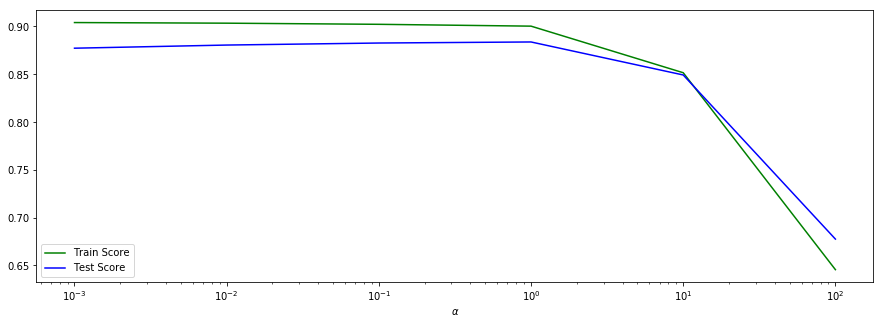

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [64]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))
scorestrain = cross_val_score(ridge, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(ridge, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train score: 0.9002
Test score: 0.8837
Cross-validation Train scores: 0.8726096671002695
Cross-validation Test scores: 0.8140662926930945


In [65]:
ridge.coef_

array([ 0.72810952, -0.13163528,  1.06954352,  1.01754983,  4.1337825 ,
        0.07662909,  3.63805709,  4.00144534, -0.06271898, -0.06271898,
       -0.06271898, 11.72784168,  0.64545328, 11.51430111,  2.47425235,
        2.47425235,  2.78254563,  2.78254563,  0.88426004, 12.54413974,
        2.57701677, -3.10963154,  2.78254563,  0.64545328])

In [66]:
max(ridge.coef_)

12.544139741293435

In [67]:
ridge.intercept_

-0.5030227034866104

In [68]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 0.1, 50).reshape(-1,1)
x_range2 = np.linspace(0.1, 10, 100).reshape(-1,1)

In [69]:
x_range = np.append(x_range1, x_range2)
coeff = []



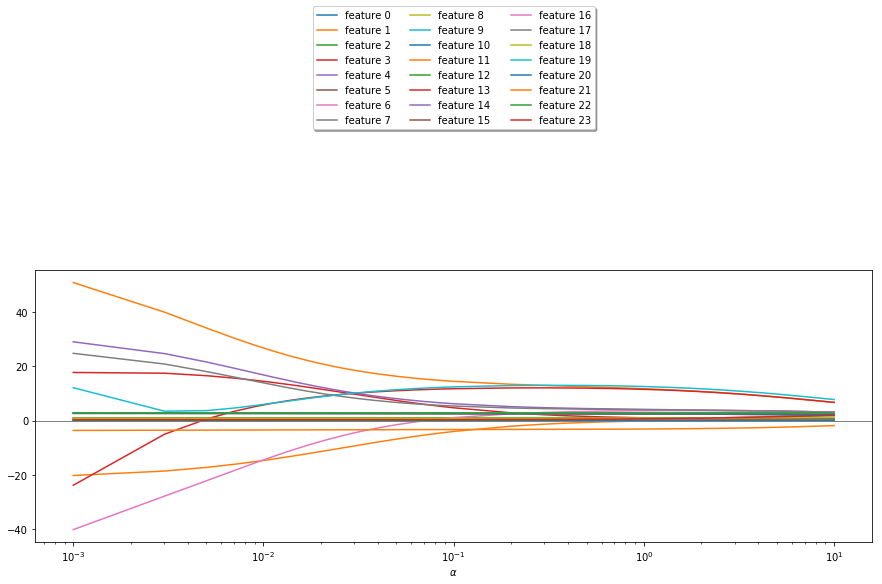

In [70]:
fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,24):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso

In [71]:
from sklearn.linear_model import Lasso
x_range = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [72]:

print(train_score_list)
print(test_score_list)



[0.9038181053432619, 0.9038083121411365, 0.9036885024345158, 0.9025143924704143, 0.9006204130936335, 0.8688705590636502, 0.3218781657667741]
[0.879871081537407, 0.8799671993832808, 0.8808922253061141, 0.8836211209714857, 0.8895464652839138, 0.8782396243019034, 0.327105840801009]


Text(0.5,0,'$\\alpha$')

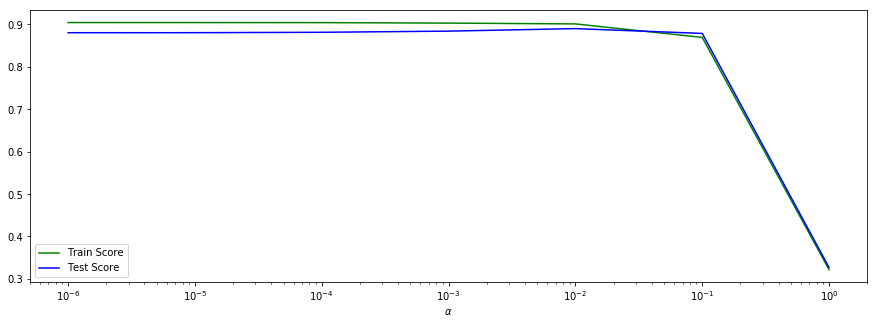

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


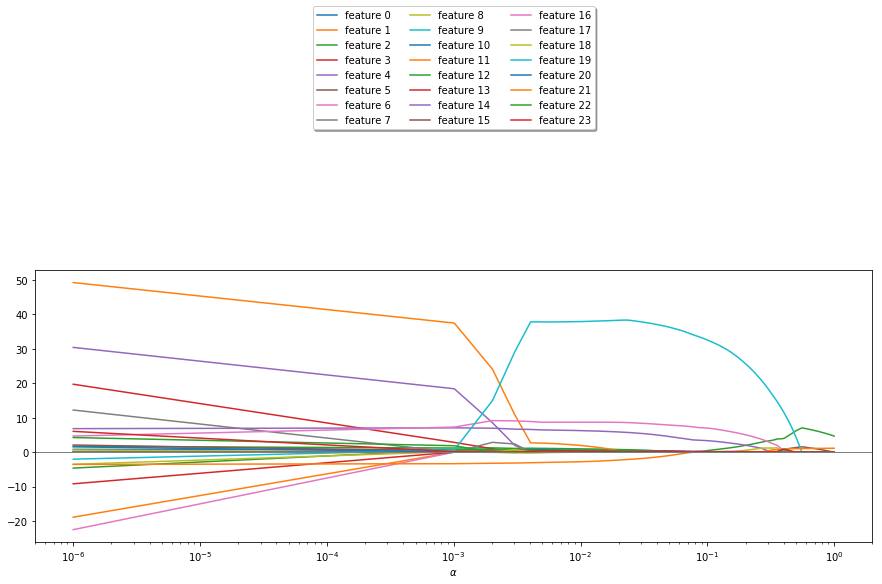

In [74]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.000001, 0.1, 100).reshape(-1,1)
x_range2 = np.linspace(0.1, 1, 100).reshape(-1,1)
x_range = np.append(x_range1, x_range2)
coeff = []

fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,24):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [75]:
lasso = Lasso(0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))
scorestrain = cross_val_score(lasso, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lasso, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train score: 0.9006
Test score: 0.8895
Cross-validation Train scores: 0.870536178213868
Cross-validation Test scores: 0.38764648780477956


Text(0,0.5,'Audit_Risk')

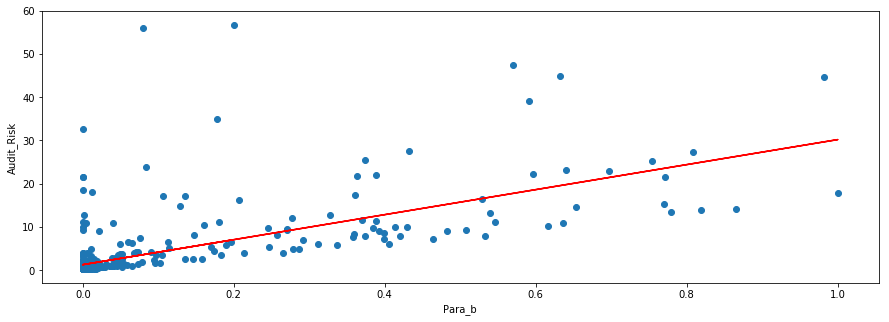

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.01)
X_train_Parab = X_train[:,4].reshape(-1,1)
lasso.fit(X_train_Parab,y_train)
y_predict = lasso.predict(X_train_Parab)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_Parab, y_predict, c = 'r')
plt.scatter(X_train_Parab,y_train)
plt.xlabel('Para_b')
plt.ylabel('Audit_Risk')

Text(0,0.5,'Audit_Risk')

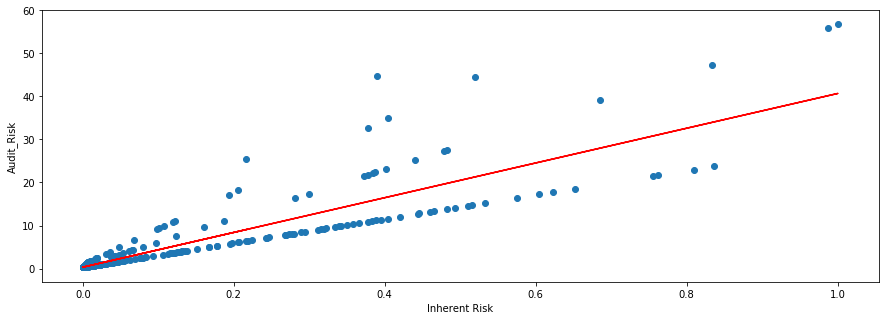

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

lasso = Lasso(0.01)
X_train_inherent = X_train[:,19].reshape(-1,1)
lasso.fit(X_train_inherent,y_train)
y_predict = lasso.predict(X_train_inherent)
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(X_train_inherent, y_predict, c = 'r')
plt.scatter(X_train_inherent,y_train)
plt.xlabel('Inherent Risk')
plt.ylabel('Audit_Risk')

# SGD Regressor

In [78]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=0, max_iter=10000, learning_rate='optimal', penalty='l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-25029771970.961746
-39925473841.77401


# SVM Simple Regression

In [79]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))
scorestrain = cross_val_score(clf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(clf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train scores: 0.5084800762353947
Test scores: 0.5432168194291958
Cross-validation Train scores: 0.4380239368674827
Cross-validation Test scores: 0.3107608486894505


# SVM Kernelized Regression - RBF

In [80]:
c_range = [1,10,100,200,300]
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []
index = []

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svr_rbf = SVR(kernel='rbf', C=x, gamma=g, epsilon=.1)
        svr_rbf.fit(X_train,y_train)
        train_score_list.append(svr_rbf.score(X_train,y_train))
        test_score_list.append(svr_rbf.score(X_test, y_test))

In [81]:
print(train_score_list)
print(test_score_list)

[0.30761744062699503, 0.581077634929471, 0.4677489138349802, 0.28140215590177153, 0.6433936321216537, 0.8995896428410038, 0.8791972420309093, 0.7776547532469469, 0.8787552075763153, 0.9941099013544685, 0.9998998287015807, 0.9998838380103865, 0.9053454588336657, 0.9982876391692539, 0.9999007771612685, 0.9998838380103865, 0.920243467714338, 0.999762145915163, 0.9999007771612685, 0.9998838380103865]
[0.3444931744262629, 0.5950018555762522, 0.4115199492543541, 0.20525005447489186, 0.6824713029943684, 0.8799146335034655, 0.6927502981693172, 0.43653823700719996, 0.8814522211083533, 0.9584479225976538, 0.7607402376631984, 0.48547165647392676, 0.9002966609664297, 0.9743566576707421, 0.7606212394690763, 0.48547165647392676, 0.9107404916317704, 0.982327728038129, 0.7606212394690763, 0.48547165647392676]


Text(0.5,0,'C and Gamma')

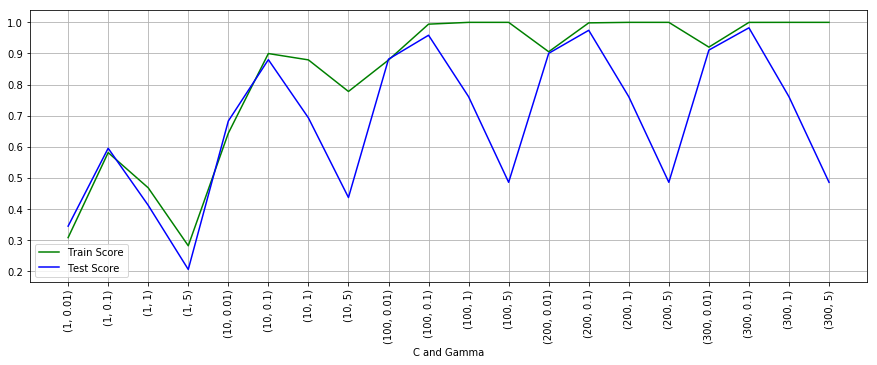

In [82]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

In [83]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)

SVR(C=300, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [84]:
print("Train scores: {}".format(svr_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svr_rbf.score(X_test, y_test)))
scorestrain = cross_val_score(svr_rbf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_rbf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train scores: 0.999762145915163
Test scores: 0.982327728038129
Cross-validation Train scores: 0.9646937271821906
Cross-validation Test scores: 0.8363771585232344


In [86]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)
pred = svr_rbf.predict(X_test)

print("Min of Pred: {}".format(min(pred)))
print("Max of Pred: {}".format(max(pred)))
print("Min of Y test: {}".format(min(y_test)))
print("Max of Y test: {}".format(max(y_test)))

Min of Pred: 0.18105884465654754
Max of Pred: 41.30261700113657
Min of Y test: 0.28
Max of Y test: 45.983999999999995


# SVM Kernelized Regression - Linear


In [87]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svr_lin = SVR(kernel='linear', C=x)
    svr_lin.fit(X_train,y_train)
    train_score_list.append(svr_lin.score(X_train,y_train))
    test_score_list.append(svr_lin.score(X_test, y_test))

In [88]:
print(train_score_list)
print(test_score_list)

[0.827678566199388, 0.8317828054217848, 0.832083253182081, 0.8321513767629669, 0.832219207533136]
[0.8492670709097057, 0.8527279069718032, 0.8529404777562363, 0.8531738385365542, 0.853279013492029]


Text(0.5,0,'C')

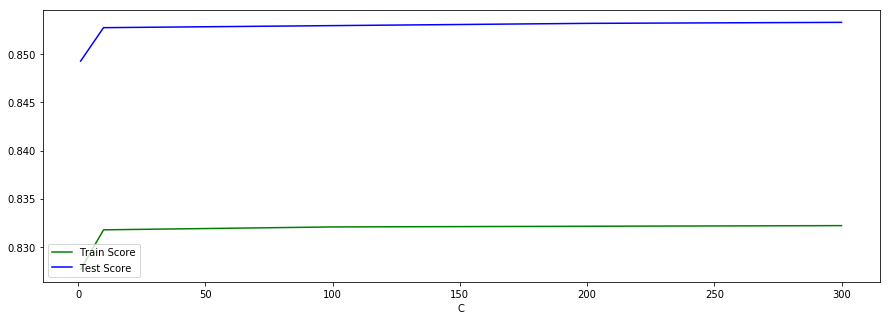

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [90]:
svr_lin = SVR(kernel='linear', C=300)
svr_lin.fit(X_train,y_train)

print("Train scores: {}".format(svr_lin.score(X_train, y_train)))
print("Test scores: {}".format(svr_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svr_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.832219207533136
Test scores: 0.853279013492029
Cross-validation Train scores: 0.8338741324371276
Cross-validation Test scores: 0.4113539582096941


# SVM Kernelized Regression - Polynomial

In [91]:
deg_range = [1,2,3,4]
coef_range = [1,2,3,4]

train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in coef_range:
        index.append((x,c))
        svr_poly = SVR(kernel='poly', C=200, degree=x, epsilon=.1,coef0=c)
        svr_poly.fit(X_train,y_train)
        train_score_list.append(svr_poly.score(X_train,y_train))
        test_score_list.append(svr_poly.score(X_test, y_test))

In [92]:
print(train_score_list)
print(test_score_list)

[0.8315735627238405, 0.831562462797349, 0.8315624627972374, 0.8315602450789613, 0.9805473635869895, 0.9803499531972223, 0.9803343080149339, 0.9803279187653854, 0.99593291227507, 0.9985931001497356, 0.9996512242429201, 0.9999001956875747, 0.999484022191806, 0.9999254721348237, 0.9999374509298217, 0.9999284881519197]
[0.8525928081317811, 0.8525937752999261, 0.8525937753030142, 0.8525772230780562, 0.9636875815875902, 0.9637883487703572, 0.9638056133663755, 0.9638679655836735, 0.9800467239353983, 0.9921167090336115, 0.9979084388775625, 0.9994349394317733, 0.9969096179436839, 0.9993361636789948, 0.9994982323694767, 0.9995313388305513]


Text(0.5,0,'Degree and Coef')

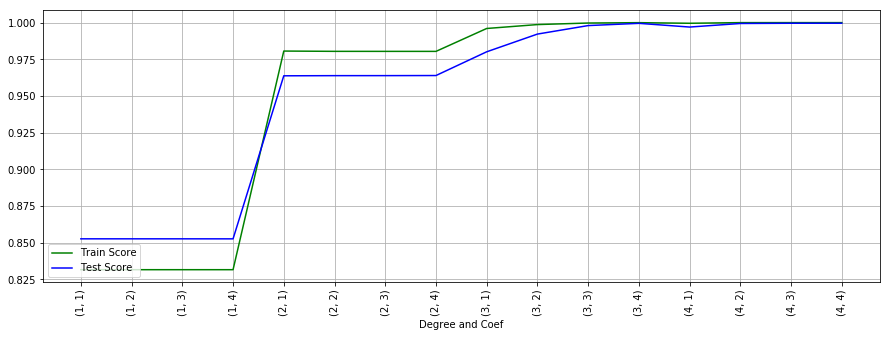

In [93]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and Coef')

In [94]:
svr_poly = SVR(kernel='poly', C=200, degree=3, epsilon=.1,coef0=4)
svr_poly.fit(X_train,y_train)


print("Train scores: {}".format(svr_poly.score(X_train, y_train)))
print("Test scores: {}".format(svr_poly.score(X_test, y_test)))
scorestrain = cross_val_score(svr_poly, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_poly, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9999001956875747
Test scores: 0.9994349394317733
Cross-validation Train scores: 0.9865225740716443
Cross-validation Test scores: 0.8553199478938587


In [95]:
pred = svr_poly.predict(X_test)

In [96]:
print("Min of Pred: {}".format(min(pred)))
print("Max of Pred: {}".format(max(pred)))
print("Min of Y test: {}".format(min(y_test)))
print("Max of Y test: {}".format(max(y_test)))

Min of Pred: 0.20686038322950345
Max of Pred: 46.24948476845274
Min of Y test: 0.28
Max of Y test: 45.983999999999995


In [99]:
x_range = np.linspace(0.24, 46, 180).reshape(-1,)

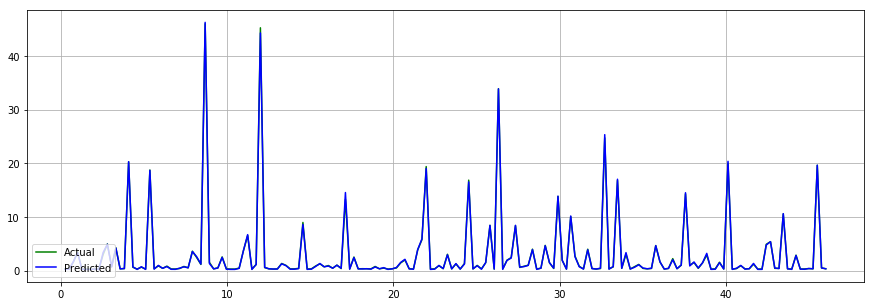

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, y_test, c = 'g', label = 'Actual')
plt.plot(x_range, pred, c = 'b', label = 'Predicted')
#plt.xscale('log')
plt.legend(loc = 3)
plt.grid(True)
#plt.xlabel(r'Degree')



# Classification Task

In [104]:
y = data['Risk']
X=data.drop(['Risk'],axis=1, inplace=False)


In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

Scaler= MinMaxScaler()
X_train = Scaler.fit_transform(X_train_dt)
X_test = Scaler.transform(X_test_dt)

# LinearSVC

In [108]:

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))
scorestrain = cross_val_score(clf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(clf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9869888475836431
Test scores: 0.9777777777777777
Cross-validation Train scores: 0.9758431615973514
Cross-validation Test scores: 0.9498055015282022


# SVC Kernel - RBF

In [109]:
from sklearn.svm import SVC

c_range = [1,10,100,200,300]
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svc_rbf = SVC(kernel='rbf', gamma=g,C=x)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        test_score_list.append(svc_rbf.score(X_test, y_test))

In [110]:
print(train_score_list)
print(test_score_list)

[0.9423791821561338, 0.9684014869888475, 0.9851301115241635, 0.9869888475836431, 0.9684014869888475, 0.9795539033457249, 0.9888475836431226, 0.9925650557620818, 0.9776951672862454, 0.9869888475836431, 0.9944237918215614, 0.9962825278810409, 0.983271375464684, 0.9925650557620818, 0.9962825278810409, 0.9981412639405205, 0.9869888475836431, 0.9944237918215614, 0.9962825278810409, 0.9981412639405205]
[0.9166666666666666, 0.9666666666666667, 0.9666666666666667, 0.9611111111111111, 0.9611111111111111, 0.9555555555555556, 0.9666666666666667, 0.9666666666666667, 0.9777777777777777, 0.9722222222222222, 0.9833333333333333, 0.9722222222222222, 0.9777777777777777, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9777777777777777, 0.9666666666666667, 0.9833333333333333, 0.9611111111111111]


Text(0.5,0,'C and Gamma')

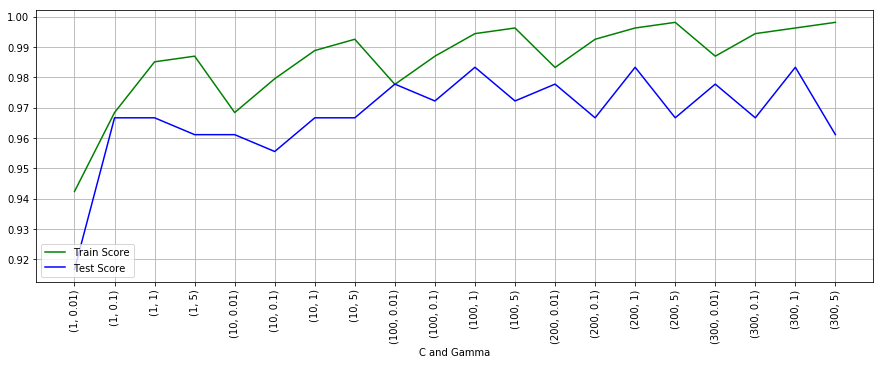

In [111]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

In [113]:
svc_rbf = SVC(kernel='rbf', gamma=1,C=200)
svc_rbf.fit(X_train,y_train)

print("Train scores: {}".format(svc_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svc_rbf.score(X_test, y_test)))
scorestrain = cross_val_score(svc_rbf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_rbf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9962825278810409
Test scores: 0.9833333333333333
Cross-validation Train scores: 0.979557210842127
Cross-validation Test scores: 0.9446173319749313


# SVC Kernel - Linear

In [114]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train,y_train)
    train_score_list.append(svc_lin.score(X_train,y_train))
    test_score_list.append(svc_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.9776951672862454, 0.9869888475836431, 0.9925650557620818, 0.9925650557620818, 0.9944237918215614]
[0.9777777777777777, 0.9777777777777777, 0.9722222222222222, 0.9833333333333333, 0.9888888888888889]


Text(0.5,0,'C')

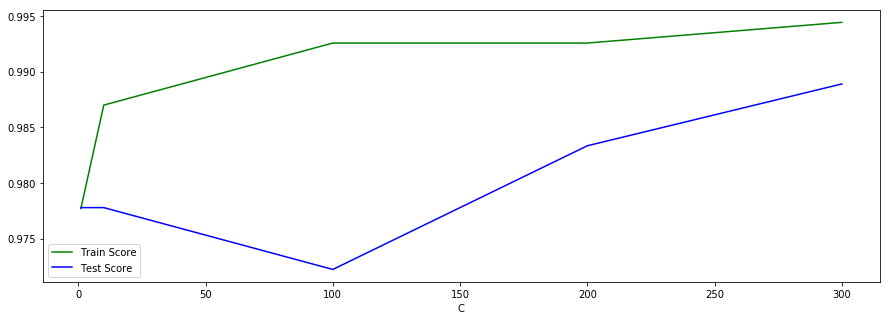

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [127]:
from sklearn.metrics import confusion_matrix
import statistics

svc_lin = SVC(kernel='linear', C=300)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svc_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svc_lin.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy in predicting Risk :",statistics.mean(y_test==pred))

Train scores: 0.9944237918215614
Test scores: 0.9888888888888889
Cross-validation Train scores: 0.9869853093316779
Cross-validation Test scores: 0.9609166126393133
Confusion matrix:
[[115   0]
 [  2  63]]
Accuracy in predicting Risk : 0.9888888888888889


# SVC Kernel - Polynomial

In [117]:
deg_range = [1,2,3,4]
c_range = [1,10,100,200,300]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        test_score_list.append(svc_poly.score(X_test, y_test))

Text(0.5,0,'Degree and C')

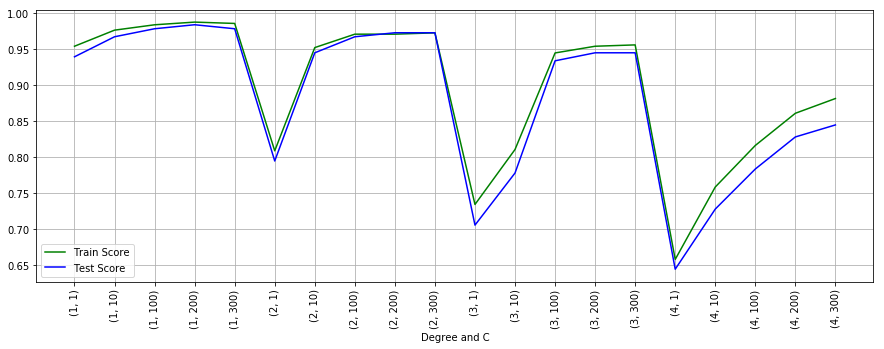

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'Degree and C')

In [121]:
svc_poly = SVC(kernel='poly', degree=2, C=300)
svc_poly.fit(X_train,y_train)

print("Train scores: {}".format(svc_poly.score(X_train, y_train)))
print("Test scores: {}".format(svc_poly.score(X_test, y_test)))
scorestrain = cross_val_score(svc_poly, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_poly, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9721189591078067
Test scores: 0.9722222222222222
Cross-validation Train scores: 0.9684254086488724
Cross-validation Test scores: 0.9443410206538854


# Decision Tree 

In [150]:
from sklearn.tree import DecisionTreeClassifier

y = data['Risk']
X=data.drop(['Risk'],axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X,y,random_state=0,)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_dt, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_dt, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_dt, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [151]:
m_range = [1,2,3,4,5]

train_score_list = []
test_score_list = []

for m in m_range:
    dtree = DecisionTreeClassifier(max_depth=m, random_state=0)
    dtree.fit(X_train_dt, y_train)
    train_score_list.append(dtree.score(X_train_dt,y_train))
    test_score_list.append(dtree.score(X_test_dt, y_test))


In [152]:
print(train_score_list)
print(test_score_list)

scorestrain = cross_val_score(dtree, X_train_dt, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(dtree, X_test_dt, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
Cross-validation Train scores: 1.0
Cross-validation Test scores: 0.9945355191256832


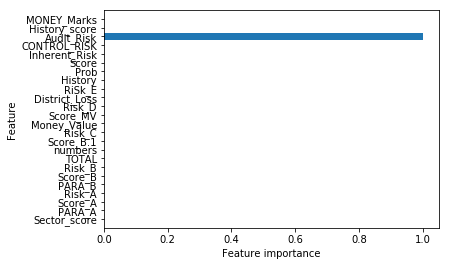

In [153]:
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = X_train_dt.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_dt.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

# Best Classifications - 1) SVC Kernel Linear

In [154]:
#Scaler= MinMaxScaler()
#X_train = Scaler.fit_transform(X_train_dt)
#X_test = Scaler.transform(X_test_dt)


from sklearn.metrics import confusion_matrix
import statistics

svc_lin = SVC(kernel='linear', C=300)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))
scorestrain = cross_val_score(svc_lin, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svc_lin, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

pred = svc_lin.predict(X_test)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy in predicting Risk :",(statistics.mean(y_test==pred)*100),'%')

Train scores: 0.9944237918215614
Test scores: 0.9888888888888889
Cross-validation Train scores: 0.9869853093316779
Cross-validation Test scores: 0.9609166126393133
Confusion matrix:
[[115   0]
 [  2  63]]
Accuracy in predicting Risk : 98.88888888888889 %


# 2) Decision Tree

In [155]:

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_dt, y_train)
pred=dtree.predict(X_test_dt)

confusion = confusion_matrix(y_test, pred)
print("Confusion matrix:\n{}".format(confusion))
print("Accuracy in predicting Risk :",(statistics.mean(y_test==pred)*100),'%')

Confusion matrix:
[[115   0]
 [  0  65]]
Accuracy in predicting Risk : 100 %
